# How to use this notebook

This is a notebook explaining how to use the functions to analyse breakthrough data. There are also some code boxes. It is important that the import code box is run using the button in the bar above when the box is selected before any other code is run.

# Pre-requisites

We need to make sure we have jupyter installed to run this notebook. Along with this, pandas, numpy, math, matplotlib, and scipy python packages are needed. If you have anaconda installed all of this will be already installed, so I recommend installing anaconda.

# File structure

Firstly, we need to make sure we have breakthrough_analysis.py and any raw data files in the same folder as this notebook. Any subsequent processed data files and graphs will be saved to the same folder. One thing we do need to be careful of is making sure each file label is different, since the script will overwrite the data without warning you.

# Importing the functions for analysis

Here the language is quite simple. We import all(asterisk) from the breakthrough_analysis.py file

In [3]:
from breakthrough_analysis import*

# Analysing raw breakthrough or regeneration data

Below are some examples of some raw data analysis. Two functions appear: analyse_breakthrough() and analyse_regen(). The parameters you need to input are explained below:

MS_csv =  the file name of the raw csv file obtained from the mass spectrometer

flow_csv =  the file name of the raw txt file obtained from the flowview file

ms_start = When the mass spectrometer starts recording in seconds

flow_start = When the flow meter starts recording in seconds

breakthrough_start/regen_start = When the adsorption or regen step is started in seconds

breakthrough_start/regen_start = When the adsorption or regen step is started in seconds

T_exp/T_regen = The temperature of the adsorption or regen in Kelvin

Discount_He = If we set this to "True" it discounts the helium from the outlet calculations. We do this if we have a helium 
bypass. In my calculations I set it as "False" as I do not have a helium bypass, and I am interested in how long it takes for 
the helium to be removed from the reactor. For regen I think this would always be true. I removed this for the breakthrough function, it only applies to regen now.

Low_conc_CO2 = If this is set as "True" we use the mass flow meter calibration for low flow rates (below 0.5 ml/min STP) and the relative sensitivity for low concentrations in the mass spectrometer. If set as "False" we use the mass flow meter calibration for normal flow rates (above 0.5 ml/min STP) and the relative sensitivity for higher concetrations of CO2.

P_sat_H2O_bath = Saturation pressure of the water in the bath in pascals at the bath temperature. Set to 0 for a dry experiment.

filter_window = A parameter used for smoothing. The number of points filtered across at a time.

smoothing_start = Time in seconds on the breakthrough curve (not raw data time) to start smoothing from for each component we smooth. Here we can't smooth oxygen as it messes up a little. Can fix if we start using O2 in experiments. Recommend to start smoothing higher up the breakthrough curve

spike_reduction = Sometimes in wet experiments we see spikes in the data, perhaps due to something like condensation, we can set this to True to try and remove these spikes or False if we don't really care

spike_reduction_parameter = This is the value that the spike reduction bases its filtering from. If the normalised co2 flow goes above this value then we delete the row

extra_normalisation = Default is False, but if we set to True then the Smoothed Normalised flow columns are renormalised with respect to final values of the normalised flow rather than the calculated inlet values. This can be useful if for example the water in the mass spec causes a lower signal of CO2 than expected, so in this case the curve would be shifted upwards.

relative_sensitivities = Set this to "relative_sensitivities = 'Default'" to just use the default mass spec relative sensitivities. Or use a dictionary to define your own i.e. "relative_sensitivities = {'N2':1, 'He':1.92, 'CO2':0.021, 'O2':0.98, 'H2O':0.0157}"

backgrounds = Set this to "backgrounds = 'Default'" to just use the default background values, or set a dictionary like with the relative sentivities

zero_backgrounds = A dictionary of components that is either True or False depending on whether we want to take the initial value as the background

full_output = Set this to True if we want all the raw data and intermediate calculated values in the output too.

plot_smoothing = Generates a plot if set to True that compares raw and smoothed data. Smoothed is lines while smoothed is markers

filelabel = File name for the output csv file.

The functions then outputs a csv file for the given file name of the processed data. Its best if this is studied to understand what the function outputs


C:\Users\johny\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\johny\OneDrive - Heriot-Watt University\Python_dir\Breakthrough analysis\breakthrough_analysis.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_breakthrough.sort_values('Breakthrough time [s]', inplace=True)
C:\Users\johny\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

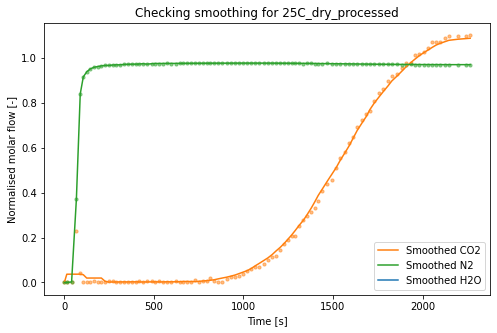

C:\Users\johny\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\johny\OneDrive - Heriot-Watt University\Python_dir\Breakthrough analysis\breakthrough_analysis.py:110: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_breakthrough.sort_values('Breakthrough time [s]', inplace=True)
C:\Users\johny\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/st

In [2]:
analyse_breakthrough(MS_csv = '25C_dry_MS.csv', #MS raw data file
flow_csv = '25C_dry_flow.txt', #Coriolis raw data file
ms_start = 0,  #MS start time
flow_start = 30, #Coriolis start time 
breakthrough_start = 9720, #Adsorption start time
breakthrough_end = 999999999, #Breakthrough end time (If we don't have another step after we can just set to really high value like here)
T_exp = 298.15, #Temperature of the experiment
Low_conc_CO2 = True, #True for fluid 2 in the co2 MFC and low conc relative sensitivities. False for fluid 1 in the co2 MFC and high conc relative sensivities
P_sat_H2O_bath = 0, #Saturation pressure [Pa] of the water in the bubbler
filter_window = 15, #Smoothing moving average window size
smoothing_start = {'CO2':0, 'N2': 500, 'He':2000, 'H2O':2000}, #What time in seconds to start smoothing each component
spike_reduction = True, #Removes any rows where the normalised co2 flow exceeds the spike_reduction_parameter
spike_reduction_parameter = 1.1, #see above
extra_normalisation = False, #If True then renormalise the smoothed normalised flow values to be with respect to the final normalised flow value
relative_sensitivities = {'N2':1, 'He':1.92, 'CO2':0.021, 'O2':0.98, 'H2O':0.0157}, #Or 'Default' for default
backgrounds = {'N2':3.78E-9, 'He':1.44E-8, 'CO2':4.16E-11, 'O2':1.86E-10, 'H2O':3.50E-11}, #Or 'Default' for default
zero_backgrounds = {'N2':True, 'He':False, 'CO2':True, 'O2':True, 'H2O':True}, #Take the initial MS value as background to overide the backgrounds given
full_output = True, #If set to True the output csv will also contain raw data and intermediate calculated values
plot_smoothing = True, #If set to True it will generate a plot comparing the raw and smoothed values for adjustment
filelabel = '25C_dry_processed') #Name of the outputted csv

analyse_breakthrough(MS_csv = '25C_dry_blank_MS.csv',
flow_csv = '25C_dry_blank_flow.txt',
ms_start = 0, 
flow_start = 30, 
breakthrough_start = 9210, 
breakthrough_end = 999999999, 
T_exp = 298.15, 
Low_conc_CO2 = True,
P_sat_H2O_bath = 0, 
filter_window = 15, 
smoothing_start = {'CO2':750, 'N2': 750, 'He':750, 'H2O':750},
spike_reduction = True,
spike_reduction_parameter = 1.1,
extra_normalisation = True,
relative_sensitivities = 'Default',
backgrounds = 'Default',
zero_backgrounds = {'N2':True, 'He':False, 'CO2':True, 'O2':True, 'H2O':True}, 
full_output = False,
filelabel = '25C_dry_blank_processed')

analyse_regen(MS_csv = '25C_dry_MS.csv',
flow_csv = '25C_dry_flow.txt',
ms_start = 0, 
flow_start = 30, 
regen_start = 4440, 
regen_end = 6450, 
T_regen = 373.15, 
Discount_He = True,
Low_conc_CO2 = True,
P_sat_H2O_bath = 0, 
filter_window = 15, 
smoothing_start = {'CO2':1100, 'N2': 500, 'He':2000, 'H2O':2000},
relative_sensitivities = {'N2':1, 'He':1.92, 'CO2':0.021, 'O2':0.98, 'H2O':0.0157},
backgrounds = 'Default',
full_output = False,
filelabel = '25C_dry_regen_processed')



# Calculation of loading

The loading is calculated using the loading() function. This is returned as two dictionaries, called loads and vol_loads in the code below. loads is the loadings in mmol/g whilst vol_loads return the loading in mmol/m3pellet. These dictionaries contain the loading for each component. To extract the loading for a specific component we can call that via typing loads['CO2'] or loads['N2'] or loads['H2O'] etc. And then we can print the result by putting this inside the print() function. 

The inputs of the function are explained below:

processed_data = This is simply one of the csv files we generated above. (Don't forget the .csv)

regen_data = If we want to calculate the loading in a regeneration, we can enter this file created here. Alternatively put 'none' if we don't have this.

bed_length =  The length of the bed in metres

bed_porosity = The porosity of the bed. A common assumption is 0.4, but if more knowledge is available use that.

bed_diameter = The diameter of the bed in metres. I measured this to be 0.7cm, but feel free to change this if a more accurate measurement is available or the column is different.

bed_mass = mass of the adsorbent in the bed in kilograms. For blank this should be the same mass as the actual experiment

T_exp =  Temperature of the experiment in Kelvin.

integration_end = The end time of integration in seconds

mode = This is the mode for the calculation. Here if 'breakthrough' is entered it calculates the loading for a breakthrough experiment. Conversely, 'regeneration' can be used. 

Below there are examples of this for a breakthrough and a blank. Then below we print the difference between the two, as the real loading. 

The reference used for the loading calculation is Wilkins et al. 2020.

In [16]:
loads, vol_loads = loading(processed_data='25C_dry_processed.csv',
regen_data = '25C_dry_regen_processed.csv',
bed_length = 0.008, 
bed_porosity = 0.4, 
bed_diameter = 0.007, 
bed_mass = 206.28E-6, 
T_exp = 298.15, 
integration_end = 2700, 
mode = 'breakthrough')

loads_blank, vol_loads_blank = loading(processed_data = '25C_dry_blank_processed.csv',
regen_data = 'None',
bed_length = 0.008, 
bed_porosity = 0.4, 
bed_diameter = 0.007, 
bed_mass = 206.28E-6, 
T_exp = 298.15, 
integration_end = 1000, 
mode = 'breakthrough')

print('The CO2 loading is '+ str(loads['CO2'] - loads_blank['CO2']) +' mmol/g' )


The CO2 loading is 1.8578047918573404 mmol/g


C:\Users\johny\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\johny\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)
C:\Users\johny\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = v

I also defined a new function called loadingcustom. This gives more freedom as to which graph is integrated. However it only returns the loading of the specified component rather than a dictionary of all components. The extra parameters here are columnlabel, which is simply the csv column we want to integrate such (1 - column)dt, and component which is just the component we want to calculate for. An example of the use of this is shown below:

In [13]:
loads25, vol_loads = loadingcustom(processed_data='25C_dry_processed.csv',
regen_data = '25C_dry_regen_processed.csv',
bed_length = 0.008, 
bed_porosity = 0.4, 
bed_diameter = 0.007, 
bed_mass = 196.6E-6,
T_exp = 298.15, 
integration_end = 2700, 
mode = 'breakthrough',
columnlabel = 'Smoothed Normalised CO2 molar flow [mol/s]',
component = 'CO2')

loads_blank25, vol_loads_blank = loadingcustom(processed_data = '25C_dry_blank_processed.csv',
regen_data = 'None',
bed_length = 0.008, 
bed_porosity = 0.4, 
bed_diameter = 0.007, 
bed_mass = 206.28E-6, 
T_exp = 298.15, 
integration_end = 1000, 
mode = 'breakthrough',
columnlabel = 'Smoothed Normalised CO2 molar flow [mol/s]',
component = 'CO2')

print('The CO2 loading at 25C is '+ str(loads25 - loads_blank25) +' mmol/g' )

The CO2 loading at 25C is 1.6478284796222085 mmol/g


C:\Users\johny\anaconda3\lib\site-packages\pandas\core\indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
C:\Users\johny\anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


# Quickly plotting the data

Below is an example of a function made to quickly plot the data. This was made quite quickly, so isn't perfect aesthetically, but is usual for quickly generating plots. Below is an explanation of each input:

data = Here is a list of all the processed data files we want to plot onto one graph.

data_labels = Here is the correspoding labels we want in the legend for the data above

variable = This is the variable we want plot. The options are: 'mole fraction [-]', 'molar flow [mol/s]', or 'concentration [mol/m3]'

Normalised = True for normalised data, False for absolute data.

Smoothed = True for smoothed data, False for absolute data.

Save = True to save the picture, False just to show it in the notebook.

filelabel = What the file will be called when saved.

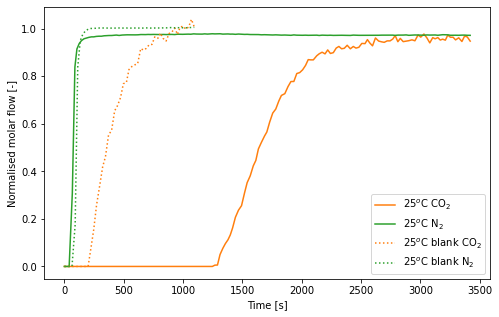

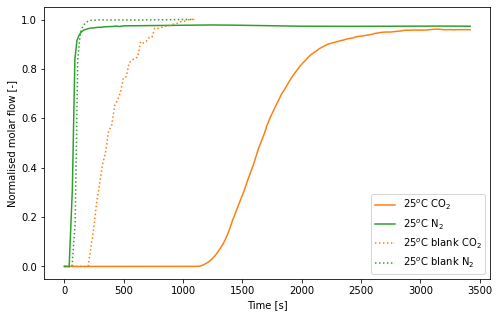

In [15]:
fig, ax = quickplot(data = ['25C_dry_processed.csv', '25C_dry_blank_processed.csv'],
data_labels = ['25$^o$C', '25$^o$C blank'],
components = ['CO2', 'N2'],
variable = 'molar flow [mol/s]', #concentration [mol/m3], molar flow [mol/s], mole fraction [-]
Normalised = True,
Smoothed = False,
Save = True,
filelabel='25C plot')


fig, ax = quickplot(data = ['25C_dry_processed.csv', '25C_dry_blank_processed.csv'],
data_labels = ['25$^o$C', '25$^o$C blank'],
components = ['CO2', 'N2'],
variable = 'molar flow [mol/s]', #concentration [mol/m3], molar flow [mol/s], mole fraction [-]
Normalised = True,
Smoothed = True,
Save = True,
filelabel='25C plot')



We can then access the figures by calling the variables fig and ax we created above to manipulate them according to the general matplotlib functions. The example below shows us changing the x-axis limit, but there are many things (like changing fonts, plot area, axes ticks, axes labels, chart title etc.) we can do, all of which can be found in the matplotlib user guide at: https://matplotlib.org/3.3.3/users/index.html Note that to view this figure now we need to open the saved file, in this case test.png.

In [ ]:
ax.set_xlim(0,3000)
plt.show()
fig.savefig('test.png', dpi=300, transparent=True, bbox_inches='tight')

## Raw data extraction 

Below is an example of how we extract the raw data from the coriolis and mass spectrometer for the breakthrough part of the experiment

In [7]:
raw_data(MS_csv = '25C_dry_MS.csv',
flow_csv = '25C_dry_flow.txt',
ms_start = 0, 
flow_start = 30, 
breakthrough_start = 9720, 
breakthrough_end = 999999999, 
T_exp = 298.15, 
Low_conc_CO2 = True,
P_sat_H2O_bath = 0, 
extra_normalisation = True,
relative_sensitivities = 'Default',
filelabel = '25C_dry_raw')


C:\Users\johny\anaconda3\lib\site-packages\pandas\core\indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
C:\Users\johny\OneDrive - Heriot-Watt University\Python_dir\Breakthrough analysis\breakthrough_analysis.py:1018: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_breakthrough.sort_values('Breakthrough time [s]', inplace=True)
C:\Users\johny\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/s

General Thoughts:

Now I am familiar the notebook is much clearer: Simply runs the functions to get processed data and goes through loading calculations

What I need to think about is how to reduce the amount of stuff you need to enter - certain things like background however can of course be changed but make it so that if it needs changed you must specify 

Look further into classes for python as a way to ammend the doc. Also the "Raw data extraction" is rather useless.

The final version of the notebook should simply have the 4 files you wish to process, the conditions and also timings of the experiments. THIS SHOULD BE ALL. The outputs should be a graph where you can change which smoothing is applied and how data is normalised soas to generate the best fit. Results displaying loading etc should also be displayed. 